# Forecasting and Predicting the Furniture Sales
    Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data.

    This dataset consists of daily sales data of various products at a superstore.

    We will need to apply Time Series (ARIMA) to build model to predict and forecast the sales of furniture for the next one year i.e. predict future values based on previously observed values. We have a 4-year furniture sales data.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Super_Store.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [3]:
df1 = df.loc[df['Category'] == 'Furniture']

In [4]:
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
df1.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [6]:
df1.size

44541

In [7]:
df1.shape

(2121, 21)

## EDA

In [8]:
df1.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [9]:
df1.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.017164,0.001696,-0.000246,0.031848,0.008775
Postal Code,0.017164,1.000000,-0.011786,0.013700,0.106736,-0.026335
Sales,0.001696,-0.011786,1.000000,0.437464,-0.028576,0.173510
Quantity,-0.000246,0.013700,0.437464,1.000000,-0.015695,0.061213
Discount,0.031848,0.106736,-0.028576,-0.015695,1.000000,-0.483769
Profit,0.008775,-0.026335,0.173510,0.061213,-0.483769,1.000000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

## MISSING VALUES

In [11]:
df1.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
cols = ['Row ID','Order ID','Ship Date','Ship Mode','Customer ID','Customer Name',
        'Segment','Country','City','State','Postal Code','Region','Product ID', 
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
df1.drop(cols,axis=1,inplace=True)
df1=df1.sort_values('Order Date')
df1.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [13]:
df1.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


In [14]:
df2=df1.groupby('Order Date')['Sales'].sum().reset_index()

In [15]:
df2.head()

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940


In [16]:
df2=df2.set_index('Order Date')

In [17]:
df2.index = pd.to_datetime(df2.index)

In [18]:
df2.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [19]:
a=df2['Sales'].resample('MS').mean()  # MS mean month Start

In [20]:
a['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

## Visualizing Furniture Sales Time Series Data

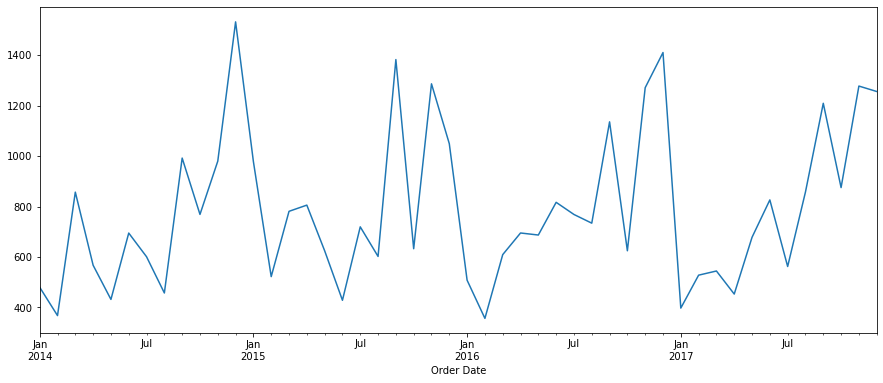

In [21]:
a.plot(figsize=(15, 6))
plt.show()

## Performing the adfuller Test

In [30]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(a)

print("ACF Statistic: %f" % result[0]) 
      
print('P-value: %f' % result[1])

ACF Statistic: -5.191070
P-value: 0.000009


-- The p-value is 0.000009, which is way below the threshold (0.05). 

-- Hence the null-hypothesis is rejected.

-- It suggest the time series does not have a unit root, meaning it is stationary.

## Decomposing
    Decomposing the time series into three distinct components: trend, seasonality,and noise

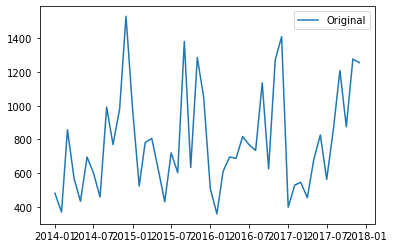

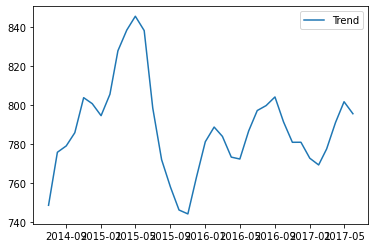

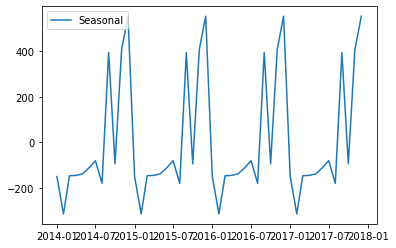

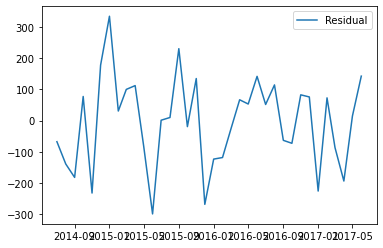

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(a)
plt.plot(a, label = 'Original')
plt.legend(loc = 'best')


trend  = decomposition.trend
plt.show()
plt.plot(trend, label = "Trend")
plt.legend(loc  = "best")

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

# Observation
- By visualizing the decomposition components of the original time series we can say that the sales of furniture is unstable, along with its ARIMA(p,d,q)

## Forecasting the best ARIMA(p,d,q) and Seasonality's

In [32]:
p = d = q  = range(0, 2) 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(X[0], X[1], X[2], 12) for X in list(itertools.product(p, d, q))]
print('Examples of paramter combination for Seasonal ARIMA....')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of paramter combination for Seasonal ARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### SARIMAX

In [37]:
mod = sm.tsa.statespace.SARIMAX(a,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

<IPython.core.display.Javascript object>

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


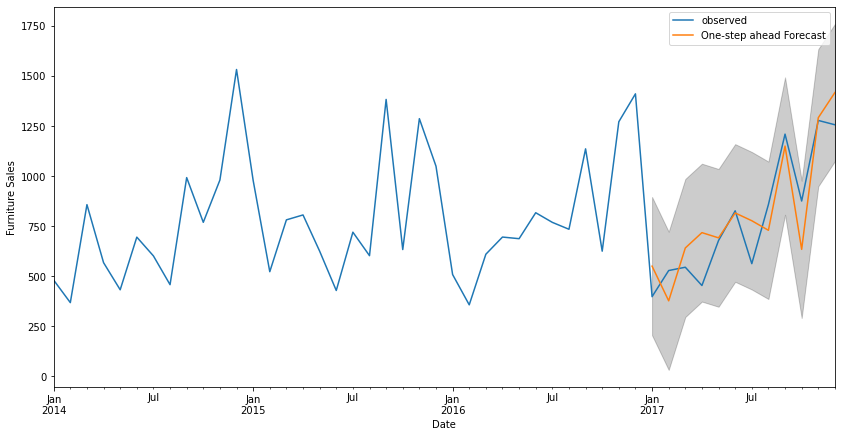

In [38]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = a['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',alpha=1, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [40]:
a_forecasted = pred.predicted_mean
a_truth = a['2017-01-01':]
mse = ((a_forecasted - a_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


##### Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales. Our furnituredaily sales range from around 400 to over 1200.

            lower Sales  upper Sales
2018-01-01    66.440051   751.053955
2018-02-01   191.940699   876.931888
2018-03-01   214.443362   899.439080
2018-04-01   127.554442   812.550225
2018-05-01   346.657810  1031.653594
2018-06-01   494.347145  1179.342929
2018-07-01   235.873538   920.869323
2018-08-01   522.882297  1207.878081
2018-09-01   875.775182  1560.770966
2018-10-01   537.150351  1222.146135
2018-11-01   945.782502  1630.778286
2018-12-01   928.336318  1613.332102
2019-01-01   -66.356793   904.539521


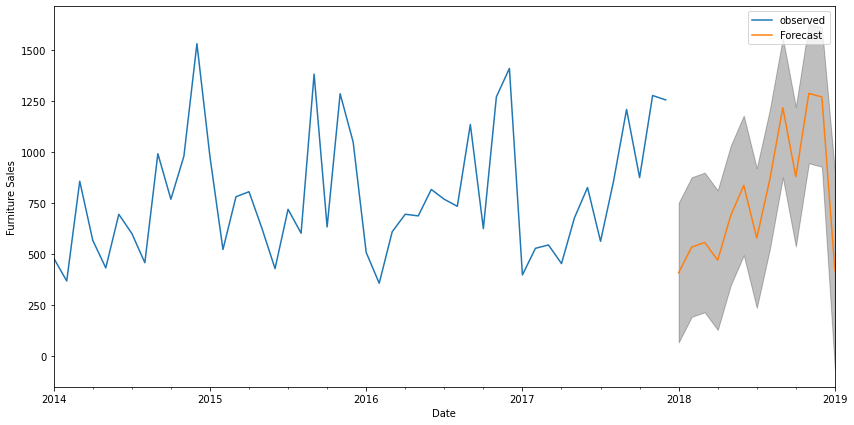

In [42]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = a.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()